In [1]:
import torch

print(torch.cuda.get_device_name(0))

NVIDIA GeForce RTX 4060 Laptop GPU


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision.models.detection import FasterRCNN_MobileNet_V3_Large_FPN_Weights
from torchvision.io import read_image

In [4]:
transform = FasterRCNN_MobileNet_V3_Large_FPN_Weights.COCO_V1.transforms()

MODEL_PATH = "./bbox_net_trained.pth"

image_dir = './data/color'

model = torch.load(MODEL_PATH, map_location=torch.device('cpu'))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#device = 'cpu'
print(f"Using device: {device}")
if str(device) == 'cuda':
    model.cuda()
else:
    model.cpu()

Using device: cuda


In [5]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

inference time: 0.0238 seconds
inference time: 41.9805 Hz
(519, 258)


/opt/conda/lib/python3.10/site-packages/torchvision/utils.py:223: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


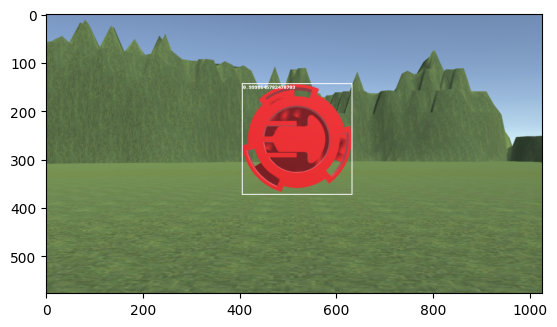

In [8]:
import time
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image

# set model into prediction mode
model.eval()

# load a test image
img = read_image('./data/test_img.png')
img = transform(img)

# send image to gpu and make prediction
tic = time.perf_counter()
img = img.to(device)
prediction = model([img])[0]
toc = time.perf_counter()
print(f'inference time: {(toc-tic):0.4f} seconds')
print(f'inference time: {1/(toc-tic):0.4f} Hz')

# extract prediction data
boxes = prediction["boxes"]
labels = [str(int(x)) for x in prediction["labels"]]
scores = [str(float(x)) for x in prediction["scores"]]

# print depth at bounding box center
bbox_center = (int((boxes[0][2] + boxes[0][0])/2), int((boxes[0][3] + boxes[0][1])/2))
print(bbox_center)

# make image displayable
img = (img*255).type(torch.uint8)

# draw bounding box on image and display
box = draw_bounding_boxes(img, boxes=boxes,
                          labels=scores,
                          colors="white",
                          #font='/usr/share/fonts/truetype/roboto-slab/RobotoSlab-Regular.ttf',
                          width=2, font_size=16)
imshow(box)
im = to_pil_image(box.detach())
im.save('./image.png', 'PNG')